### Coding with Qiskit 1

Before solving this notebook, make sure you have `Qiskit > 1.0` or higher and `Qiskit-ibm-runtime > 0.28` or higher installed. You must use `EstimatorV2` for your solution.

In [1]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit-aer -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 6.6 MB/s eta 0:00:00


In [2]:
!pip show qiskit qiskit-ibm-runtime

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime
---
Name: qiskit-ibm-runtime
Version: 0.33.2
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: https://github.com/Qiskit/qiskit-ibm-runtime
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: 


#### Creating the quantum circuit

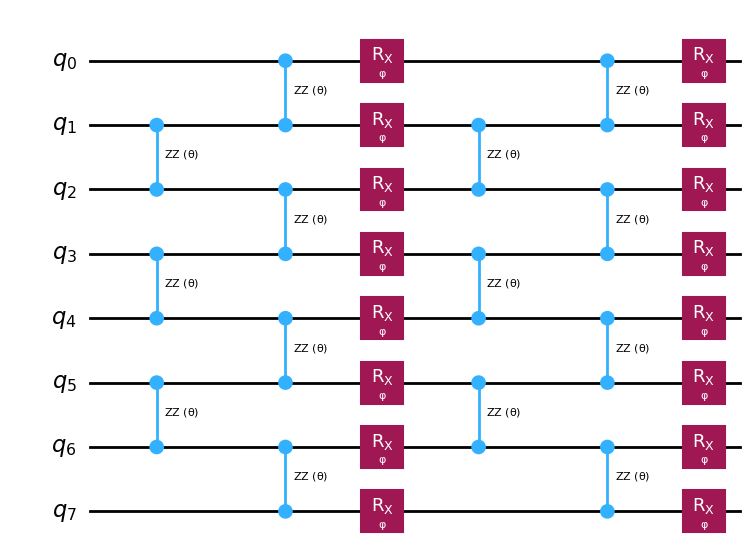

In [3]:
from qiskit.circuit import QuantumCircuit, Parameter

theta = Parameter('θ')
phi = Parameter('φ')
num_qubits = 8
num_steps = 2

qc = QuantumCircuit(num_qubits)
for _ in range(num_steps):
    for i in range(1, num_qubits-1, 2):
        qc.rzz(theta, i, i+1)
    for i in range(0, num_qubits, 2):
        qc.rzz(theta, i, i+1)
    for i in range(num_qubits):
        qc.rx(phi, i)

qc.draw('mpl', fold=-1)

The goal of this exercise will be to calculate the ideal and noisy expectation values of the specified observables for a range of parameter values. In particular, both $\theta$ and $\phi$ will be varied between $0$ and $\pi$ in 5 equal intervals.

#### Q1. Generate parameters

In this step you need to generate 5 equal interval values between $[0,\pi]$ for each of $\theta$ and $\phi$. Create a copy of the circuit, assign a parameter of your choice, and draw the circuit.

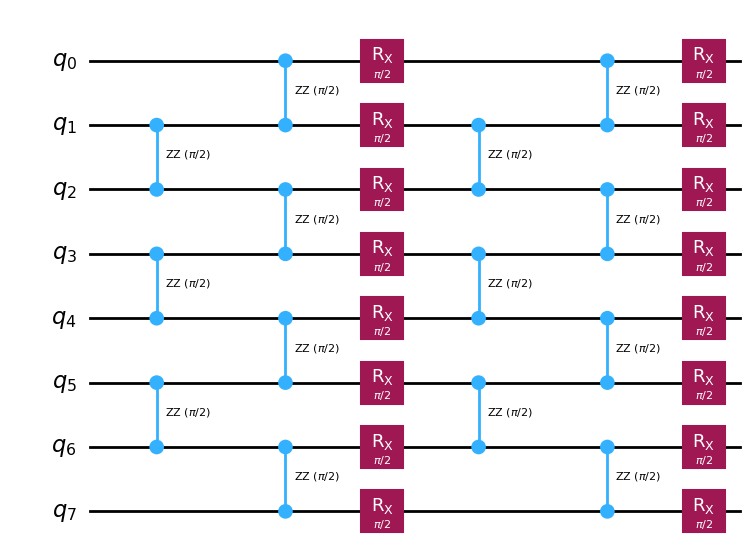

In [4]:
### Your solution here

import numpy as np

θ = np.linspace(0, np.pi, 5)
φ = np.linspace(0, np.pi, 5)

qc.assign_parameters({theta: θ[2], phi: φ[2]}).draw('mpl')

#### Q2. Transpile the circuit

In this step you will consider `FakeKolkataV2` as your `backend`.

- Transpile the circuit on this backend.
- Print the different gates and their counts in the transpiled circuit.
- Print the layout (i.e., the physical qubits on which the circuit is placed) of the transpiled circuit.

In [5]:
### Your solution here

from qiskit_ibm_runtime.fake_provider import FakeKolkataV2
from qiskit.visualization import plot_circuit_layout
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend = FakeKolkataV2()
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
transpiled_qc = pm.run(qc)

In [6]:
print("Gate counts in the transpiled circuit:")
print(transpiled_qc.count_ops())

Gate counts in the transpiled circuit:
OrderedDict([('rz', 62), ('sx', 32), ('cx', 28)])


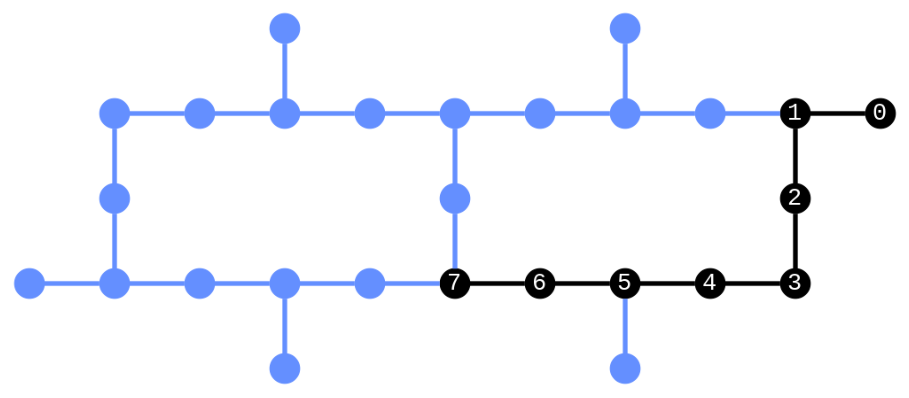

In [7]:
plot_circuit_layout(transpiled_qc, backend=backend)

In [8]:
initial_layout = transpiled_qc.layout.initial_layout

print(f"{'Logical Qubit':<20}{'Physical Qubit'}")
print("="*40)
for logical_qubit, physical_qubit in initial_layout.get_physical_bits().items():
    print(f"{logical_qubit:<20}{physical_qubit}")

Logical Qubit       Physical Qubit
25                  Qubit(QuantumRegister(8, 'q'), 1)
24                  Qubit(QuantumRegister(8, 'q'), 2)
26                  Qubit(QuantumRegister(8, 'q'), 0)
23                  Qubit(QuantumRegister(8, 'q'), 3)
21                  Qubit(QuantumRegister(8, 'q'), 4)
18                  Qubit(QuantumRegister(8, 'q'), 5)
15                  Qubit(QuantumRegister(8, 'q'), 6)
12                  Qubit(QuantumRegister(8, 'q'), 7)
0                   Qubit(QuantumRegister(19, 'ancilla'), 0)
1                   Qubit(QuantumRegister(19, 'ancilla'), 1)
2                   Qubit(QuantumRegister(19, 'ancilla'), 2)
3                   Qubit(QuantumRegister(19, 'ancilla'), 3)
4                   Qubit(QuantumRegister(19, 'ancilla'), 4)
5                   Qubit(QuantumRegister(19, 'ancilla'), 5)
6                   Qubit(QuantumRegister(19, 'ancilla'), 6)
7                   Qubit(QuantumRegister(19, 'ancilla'), 7)
8                   Qubit(QuantumRegister(19,

#### Q3. Construct observable

In this step you will

- Construct the following observable: $\sum_{i=1}^{N}\langle Z_i \rangle / N$ where $N$ is the number of qubits.
- Apply the layout of the transpiled circuit to this observable. Print the observable after applying layout.

In [9]:
### Your solution here

from qiskit.quantum_info import SparsePauliOp

z_ops = [('I' * i + 'Z' + 'I' * (num_qubits-i-1), 1/num_qubits) for i in range(num_qubits)]

observable = SparsePauliOp.from_list(z_ops)
observable = observable.apply_layout(transpiled_qc.layout)
print(observable)

SparsePauliOp(['IIIIIIIIIIIIIIZIIIIIIIIIIII', 'IIIIIIIIIIIZIIIIIIIIIIIIIII', 'IIIIIIIIZIIIIIIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIII', 'IZIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
 0.125+0.j, 0.125+0.j])


#### Q4. Prepare for execution

In this step you will create

- Primitive Unified Bloc (PUB) for each possible parameter combination (i.e., there will be $5\times5 = 25$ possible parameter combinations).

In [10]:
### Your solution here
from itertools import product

params = list(product(θ,φ))
pub = (transpiled_qc, observable, params)

#### Q5. Noiseless execution

In this step you will

- Construct a `StatevectorEstimator`
- Execute all the PUBs as a **single job**
- Obtain the expectation value for each parameter combination; store the result

In [11]:
# ### Your solution here

from qiskit.primitives import StatevectorEstimator

estimator = StatevectorEstimator()
job = estimator.run([pub])
noiseless_result = job.result()
print(noiseless_result)

PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(25,), dtype=float64>), stds=np.ndarray(<shape=(25,), dtype=float64>), shape=(25,)), metadata={'target_precision': 0.0, 'circuit_metadata': {}})], metadata={'version': 2})


In [25]:
noiseless_result[0].data.evs

array([ 1.00000000e+00,  2.58365378e-16, -1.00000000e+00, -4.92227786e-16,
        1.00000000e+00,  1.00000000e+00,  3.17861652e-01, -5.51776695e-01,
        3.17861652e-01,  1.00000000e+00,  1.00000000e+00,  6.87500000e-01,
       -2.27682456e-18,  6.87500000e-01,  1.00000000e+00,  1.00000000e+00,
        4.94638348e-01, -1.98223305e-01,  4.94638348e-01,  1.00000000e+00,
        1.00000000e+00,  2.50000000e-01, -5.00000000e-01,  2.50000000e-01,
        1.00000000e+00])

#### Q6. Noisy execution

In this step you will

- Construct an `EstimatorV2` object with `FakeKolkataV2` as the backend
- Execute all the PUBs as a **single job**
- Obtain the expectation value for each parameter combination
- In a single plot where X-axis is $\theta$ and Y-axis is $\Phi$, plot the outcomes of the noisy and noiseless expectation values

In [12]:
### Your solution here

from qiskit_ibm_runtime import EstimatorV2

estimator = EstimatorV2(mode=backend)
job = estimator.run([pub])
noisy_result = job.result()
print(noisy_result)

PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(25,), dtype=float64>), stds=np.ndarray(<shape=(25,), dtype=float64>), shape=(25,)), metadata={'target_precision': 0.015625, 'shots': 4096, 'circuit_metadata': {}})], metadata={'version': 2})


In [13]:
noisy_result[0].data.evs

array([ 0.96063232,  0.00701904, -0.93328857, -0.00177002,  0.93914795,
        0.9642334 ,  0.31567383, -0.51300049,  0.2911377 ,  0.93988037,
        0.96380615,  0.66241455,  0.0020752 ,  0.63745117,  0.93939209,
        0.96087646,  0.47467041, -0.18353271,  0.46185303,  0.94244385,
        0.96514893,  0.26300049, -0.45562744,  0.24694824,  0.93994141])

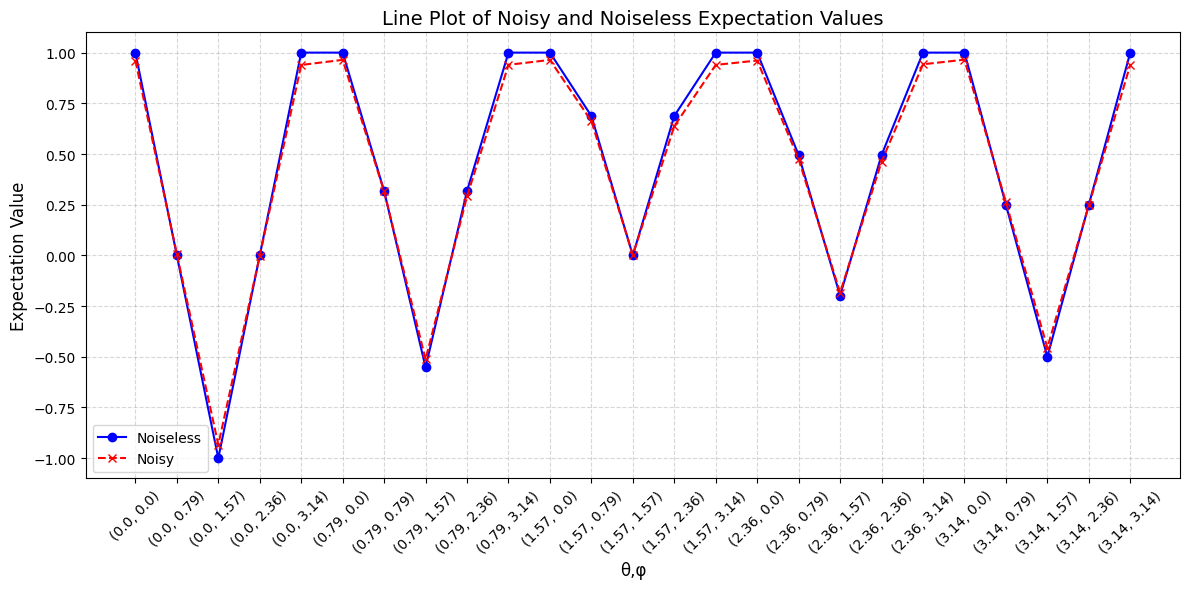

In [14]:
import matplotlib.pyplot as plt

noiseless_result = [ 1.00000000e+00,  2.58365378e-16, -1.00000000e+00, -4.92227786e-16, 1.00000000e+00,  1.00000000e+00,  3.17861652e-01, -5.51776695e-01, 3.17861652e-01,  1.00000000e+00,  1.00000000e+00,  6.87500000e-01, -2.27682456e-18,  6.87500000e-01,  1.00000000e+00,  1.00000000e+00, 4.94638348e-01, -1.98223305e-01,  4.94638348e-01,  1.00000000e+00, 1.00000000e+00,  2.50000000e-01, -5.00000000e-01,  2.50000000e-01, 1.00000000e+00]
noisy_result = [ 0.96063232,  0.00701904, -0.93328857, -0.00177002,  0.93914795, 0.9642334 ,  0.31567383, -0.51300049,  0.2911377 ,  0.93988037, 0.96380615,  0.66241455,  0.0020752 ,  0.63745117,  0.93939209, 0.96087646,  0.47467041, -0.18353271,  0.46185303,  0.94244385, 0.96514893,  0.26300049, -0.45562744,  0.24694824,  0.93994141]

plt.figure(figsize=(12, 6))
plt.plot(range(len(params)), noiseless_result, label='Noiseless', marker='o', linestyle='-', color='blue')
plt.plot(range(len(params)), noisy_result, label='Noisy', marker='x', linestyle='--', color='red')
plt.xticks(ticks=range(len(params)), labels=[f"({round(t[0], 2)}, {round(t[1], 2)})" for t in params], rotation=45)
plt.xlabel(r'θ,φ', fontsize=12)
plt.ylabel('Expectation Value', fontsize=12)
plt.title('Line Plot of Noisy and Noiseless Expectation Values', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### Q7. Building towards error mitigation

In this step you will create the framework for error mitigation. Obtaining error mitigated results in not possible on a noisy simulator. For this example, we want the following

- Apply Dynamical Decoupling with `XY4` pulse
- Apply Zero Noise Extrapolation with `[1,2,3]` as the noise factors and `exponential` extrapolator
- Turn on Gate Twirling
- Turn off Measurement Twirling
- Turn off Measurement Error Mitigation

Construct an `EstimatorV2` object with the previously stated error mitigation and suppression options.

In [15]:
### Your solution here

from qiskit_ibm_runtime import EstimatorV2

estimator = EstimatorV2(mode=backend)
options = estimator.options

options.dynamical_decoupling.sequence_type = "XY4"
options.resilience.zne.noise_factors = [1, 2, 3]
options.resilience.zne.extrapolator = "exponential"
options.twirling.enable_gates = True
options.twirling.enable_measure = False
options.resilience.measure_mitigation = False